In [1]:
#@title A demonstration of a integration of a process model and simple reservoir model
#@markdown This is a demo of how reservoir simulation can be intergrated into process simulation.
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
#%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process.processTools import simplereservoir
from neqsim.process import openprocess
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

# We start by importing the simple reservoir simulation
This is a test $a=3^2$



sim year  0.0
sim year  1.0
sim year  2.0
sim year  3.0
sim year  4.0
sim year  5.0


Text(0, 0.5, 'Power total [MW]')

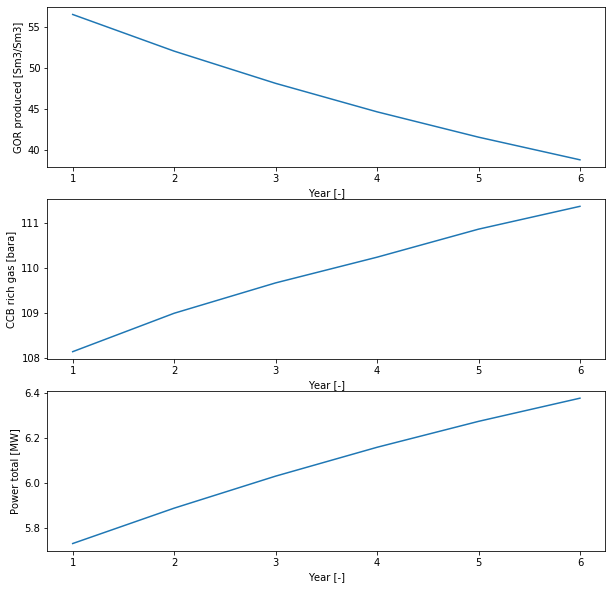

In [11]:
from neqsim.process import openprocess
import matplotlib.pyplot as plt
resmodel = openprocess('c:/temp/resmode1.neqsim')

reservoir = resmodel.getUnit('Well 1 reservoir')
wellStream = reservoir.getOilProducer(0).getStream()
wellStream.setFlowRate(30000000.0, "kg/day")

deltat = 24*60*60.0*365
resmodel.setTimeStep(deltat)

GasOilProcess = openprocess('c:/temp/offshorePro.neqsim')
GasOilProcess.getUnit("well stream").setStream(wellStream)
GasOilProcess.getUnit("well stream cooler/heater").setOutTemperature(66.0, "C")
GasOilProcess.getUnit("well stream cooler/heater").setOutPressure(52.21, "bara")
GasOilProcess.getUnit("inlet choke valve").setOutletPressure(51.21, "bara")
GasOilProcess.getUnit("oil HP to MP valve").setOutletPressure(15.0, "bara")
GasOilProcess.getUnit("oil cooler/heater to 2nd stage").setOutTemperature(85.0, "C")
GasOilProcess.getUnit("oil MP to LP valve").setOutletPressure(1.8, "bara")
GasOilProcess.getUnit("Water HP to LP valve").setOutletPressure(1.01325, "bara")
GasOilProcess.getUnit("dew point scrubber cooler2").setOutTemperature(33.0, "C")
GasOilProcess.getUnit("2nd stage cooler").setOutTemperature(33.0, "C")
GasOilProcess.getUnit("1st stage gas heat exchanger").setOutTemperature(33.0, "C")
GasOilProcess.getUnit("1st stage recompressor").setIsentropicEfficiency(0.75)
GasOilProcess.getUnit("2nd stage recompressor").setIsentropicEfficiency(0.75)

time = []
GORprocess = []
cricondenbarrichgas = []
power = []
for step in range(6):
    print('sim year ' , reservoir.getTime()/(60.0*60*24*365))
    resmodel.runTransient()
    GasOilProcess.run()
    time.append(reservoir.getTime()/(60.0*60*24*365))
    GOR=GasOilProcess.getUnit("rich gas").getFluid().getFlowRate("Sm3/hr")/GasOilProcess.getUnit("stable oil").getFluid().getFlowRate("m3/hr")
    GORprocess.append(GOR)
    cricondenbarrichgas.append(GasOilProcess.getUnit("rich gas").CCB("bara"))
    power.append(GasOilProcess.getPower("W")/1.0e6)


plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
plt.subplot(3, 1, 1)
plt.plot(time, GORprocess)
plt.xlabel('Year [-]')
plt.ylabel('GOR produced [Sm3/Sm3]')
plt.subplot(3, 1, 2)
plt.plot(time, cricondenbarrichgas)
plt.xlabel('Year [-]')
plt.ylabel('CCB rich gas [bara]')
plt.subplot(3, 1, 3)
plt.plot(time, power)
plt.xlabel('Year [-]')
plt.ylabel('Power total [MW]')


In [8]:
#Read results
GasLiqidRatio = GasOilProcess.getUnit("rich gas").getFluid().getFlowRate("Sm3/hr")/GasOilProcess.getUnit("stable oil").getFluid().getFlowRate("m3/hr")
compressorPower1 = GasOilProcess.getUnit("1st stage recompressor").getPower()/1.0e3
compressorPower2 = GasOilProcess.getUnit("2nd stage recompressor").getPower()/1.0e3
cooler1Duty = GasOilProcess.getUnit("1st stage gas heat exchanger").getDuty()/1e3
cooler2Duty = GasOilProcess.getUnit("2nd stage cooler").getDuty()/1e3

wellStreamFLowMSm3day = GasOilProcess.getUnit("well stream").getFluid().getFlowRate("MSm3/day")
richGasFLowMSm3day = GasOilProcess.getUnit("rich gas").getFluid().getFlowRate("MSm3/day")
gasInletSepFlowMSm3day = GasOilProcess.getUnit("1st stage separator").getGasOutStream().getFluid().getFlowRate("MSm3/day")
stableOilFLowm3hr = GasOilProcess.getUnit("stable oil").getFluid().getFlowRate("m3/hr")
waterToTreatmentRatem3hr = GasOilProcess.getUnit("water to treatment").getFluid().getFlowRate("m3/hr")
resycleFLowDewPointScrubber = GasOilProcess.getUnit("dew point control scrubber").getLiquidOutStream().getFluid().getFlowRate("kg/hr")
GOR=GasOilProcess.getUnit("rich gas").getFluid().getFlowRate("Sm3/hr")/ GasOilProcess.getUnit("stable oil").getFluid().getFlowRate("m3/hr")
TVPofexportoil = GasOilProcess.getUnit("stable oil").TVP(30.0, "C")
CCB_exportgas = GasOilProcess.getUnit("rich gas").CCB("bara")
CCT_exportgas = GasOilProcess.getUnit("rich gas").CCT("C")

print("rich gas flow", richGasFLowMSm3day, " MSm3/day")
print("1st stage recompressor power", compressorPower1, " kW")
print("2nd stage recompressor power", compressorPower2, " kW")
print("1st stage gas cooler duty ", cooler1Duty, " kW")
print("2nd stage cooler duty ", cooler2Duty, " kW")
print("stable oil production ", stableOilFLowm3hr, " me/hr")
print("rich gas production ", richGasFLowMSm3day, " MS3/day")
print("GOR ", GOR)
print("TVP of export oil ", TVPofexportoil)
print("cricondenbar pressure of rich gas ", CCB_exportgas, " bara")
print("cricondentherm temperature of rich gas ", CCT_exportgas, " C")

rich gas flow 3.146270964847518  MSm3/day
1st stage recompressor power 4314.541465406837  kW
2nd stage recompressor power 5814.754454590872  kW
1st stage gas cooler duty  -10413.371481236567  kW
2nd stage cooler duty  -10930.220628637911  kW
stable oil production  2795.954583503457  me/hr
rich gas production  3.146270964847518  MS3/day
GOR  46.88725071172142
TVP of export oil  0.9429085578280882
cricondenbar pressure of rich gas  109.89947502930058  bara
cricondentherm temperature of rich gas  33.457346197498055  C
